## Predicting Space Mission Success 

Given *data about all space missions since 1957*, we need to predict if a given space mission **succeeded** or not. 

Data source: https://www.kaggle.com/datasets/agirlcoding/all-space-missions-from-1957

### Importing Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('Space_Corrected.csv')
data

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


### Preprocessing

In [4]:
df = data.copy()

In [5]:
df = df.drop([df.columns[0], df.columns[1], 'Detail', 'Location'], axis=1)
df

,Company Name,Datum,Status Rocket,Rocket,Status Mission
0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",StatusActive,50.0,Success
1,CASC,"Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success
2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success
3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",StatusActive,65.0,Success
4,ULA,"Thu Jul 30, 2020 11:50 UTC",StatusActive,145.0,Success
...,...,...,...,...,...
4319,US Navy,"Wed Feb 05, 1958 07:33 UTC",StatusRetired,NaN,Failure
4320,AMBA,"Sat Feb 01, 1958 03:48 UTC",StatusRetired,NaN,Success
4321,US Navy,"Fri Dec 06, 1957 16:44 UTC",StatusRetired,NaN,Failure
4322,RVSN USSR,"Sun Nov 03, 1957 02:30 UTC",StatusRetired,NaN,Success


#### Missing Values

In [6]:
df.columns

Index(['Company Name', 'Datum', 'Status Rocket', ' Rocket', 'Status Mission'], dtype='object')

In [7]:
df.columns = ['Company Name', 'Datum', 'Status Rocket', 'Rocket', 'Status Mission']

In [8]:
df.isna().sum()

Company Name         0
Datum                0
Status Rocket        0
Rocket            3360
Status Mission       0
dtype: int64

In [9]:
df['Rocket'].unique()

array(['50.0 ', '29.75 ', nan, '65.0 ', '145.0 ', '64.68 ', '48.5 ',
       '90.0 ', '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ',
       '12.0 ', '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ',
       '41.8 ', '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ',
       '350.0 ', '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ',
       '123.0 ', '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ',
       '140.0 ', '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ',
       '190.0 ', '135.0 ', '20.0 ', '136.6 ', '5,000.0 ', '1,160.0 ',
       '59.0 ', '63.23 '], dtype=object)

In [14]:
df['Rocket'] = df['Rocket'].apply(lambda x: str(x).replace(',', '')).astype(float)

In [17]:
# Impute missing values
df['Rocket'] = df['Rocket'].fillna(df['Rocket'].mean())

In [18]:
df.isna().sum()

Company Name      0
Datum             0
Status Rocket     0
Rocket            0
Status Mission    0
dtype: int64

### Encoding

In [19]:
df

,Company Name,Datum,Status Rocket,Rocket,Status Mission
0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",StatusActive,50.000000,Success
1,CASC,"Thu Aug 06, 2020 04:01 UTC",StatusActive,29.750000,Success
2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",StatusActive,153.792199,Success
3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",StatusActive,65.000000,Success
4,ULA,"Thu Jul 30, 2020 11:50 UTC",StatusActive,145.000000,Success
...,...,...,...,...,...
4319,US Navy,"Wed Feb 05, 1958 07:33 UTC",StatusRetired,153.792199,Failure
4320,AMBA,"Sat Feb 01, 1958 03:48 UTC",StatusRetired,153.792199,Success
4321,US Navy,"Fri Dec 06, 1957 16:44 UTC",StatusRetired,153.792199,Failure
4322,RVSN USSR,"Sun Nov 03, 1957 02:30 UTC",StatusRetired,153.792199,Success


In [20]:
df['Company Name'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [35]:
def get_year_from_date(date):
    year = re.search(r"[^,]*$", date).group(0)
    year = re.search(r"^\s[^\s]*", year).group(0)
    return np.int16(year)

def get_month_from_date(date):
    month = re.search(r"^[^0-9]*", date).group(0)
    month = re.search(r"\s.*$", month).group(0)
    return month.strip()

In [36]:
df['Year'] = df['Datum'].apply(get_year_from_date)
df['Month'] = df['Datum'].apply(get_month_from_date)
df.drop('Datum', axis=1, inplace=True)

In [37]:
df

,Company Name,Status Rocket,Rocket,Status Mission,Year,Month
0,SpaceX,StatusActive,50.000000,Success,2020,Aug
1,CASC,StatusActive,29.750000,Success,2020,Aug
2,SpaceX,StatusActive,153.792199,Success,2020,Aug
3,Roscosmos,StatusActive,65.000000,Success,2020,Jul
4,ULA,StatusActive,145.000000,Success,2020,Jul
...,...,...,...,...,...,...
4319,US Navy,StatusRetired,153.792199,Failure,1958,Feb
4320,AMBA,StatusRetired,153.792199,Success,1958,Feb
4321,US Navy,StatusRetired,153.792199,Failure,1957,Dec
4322,RVSN USSR,StatusRetired,153.792199,Success,1957,Nov


In [40]:
df['Status Rocket'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [42]:
df['Status Mission'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [43]:
df["Status Mission"] = df['Status Mission'].apply(lambda x: x if x == "Success" else "Failure")

In [44]:
df['Status Mission'].unique()

array(['Success', 'Failure'], dtype=object)

In [45]:
encoder = LabelEncoder()

df['Status Mission'] = encoder.fit_transform(df['Status Mission'])

In [46]:
df

,Company Name,Status Rocket,Rocket,Status Mission,Year,Month
0,SpaceX,StatusActive,50.000000,1,2020,Aug
1,CASC,StatusActive,29.750000,1,2020,Aug
2,SpaceX,StatusActive,153.792199,1,2020,Aug
3,Roscosmos,StatusActive,65.000000,1,2020,Jul
4,ULA,StatusActive,145.000000,1,2020,Jul
...,...,...,...,...,...,...
4319,US Navy,StatusRetired,153.792199,0,1958,Feb
4320,AMBA,StatusRetired,153.792199,1,1958,Feb
4321,US Navy,StatusRetired,153.792199,0,1957,Dec
4322,RVSN USSR,StatusRetired,153.792199,1,1957,Nov


### Scaling

In [47]:
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [48]:
# Given some data, a column of that data, and an ordering of the values in that column. 
# Perform ordinal encoding on the column
# and return the result.
def ordinal_encode(df, column, ordering):
    return df[column].apply(lambda x: ordering.index(x))

In [49]:
df['Status Rocket'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [50]:
status_ordering = ['StatusRetired', 'StatusActive']

In [53]:
df['Month'] = ordinal_encode(df, 'Month', month_ordering)
df['Status Rocket'] = ordinal_encode(df, 'Status Rocket', status_ordering)

In [54]:
df

,Company Name,Status Rocket,Rocket,Status Mission,Year,Month
0,SpaceX,1,50.000000,1,2020,7
1,CASC,1,29.750000,1,2020,7
2,SpaceX,1,153.792199,1,2020,7
3,Roscosmos,1,65.000000,1,2020,6
4,ULA,1,145.000000,1,2020,6
...,...,...,...,...,...,...
4319,US Navy,0,153.792199,0,1958,1
4320,AMBA,0,153.792199,1,1958,1
4321,US Navy,0,153.792199,0,1957,11
4322,RVSN USSR,0,153.792199,1,1957,10


In [55]:
df['Company Name']

0          SpaceX
1            CASC
2          SpaceX
3       Roscosmos
4             ULA
          ...    
4319      US Navy
4320         AMBA
4321      US Navy
4322    RVSN USSR
4323    RVSN USSR
Name: Company Name, Length: 4324, dtype: object

In [56]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

In [57]:
df = onehot_encode(df, 'Company Name')

In [58]:
df

,Status Rocket,Rocket,Status Mission,Year,Month,Company Name_AEB,Company Name_AMBA,Company Name_ASI,Company Name_Arianespace,Company Name_Arm??e de l'Air,...,Company Name_SpaceX,Company Name_Starsem,Company Name_ULA,Company Name_US Air Force,Company Name_US Navy,Company Name_UT,Company Name_VKS RF,Company Name_Virgin Orbit,Company Name_Yuzhmash,Company Name_i-Space
0,1,50.000000,1,2020,7,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,29.750000,1,2020,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,153.792199,1,2020,7,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,65.000000,1,2020,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,145.000000,1,2020,6,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,0,153.792199,0,1958,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4320,0,153.792199,1,1958,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4321,0,153.792199,0,1957,11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4322,0,153.792199,1,1957,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [59]:
y = df['Status Mission']
X = df.drop('Status Mission', axis=1)

In [61]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Status Rocket,Rocket,Year,Month,Company Name_AEB,Company Name_AMBA,Company Name_ASI,Company Name_Arianespace,Company Name_Arm??e de l'Air,Company Name_Blue Origin,...,Company Name_SpaceX,Company Name_Starsem,Company Name_ULA,Company Name_US Air Force,Company Name_US Navy,Company Name_UT,Company Name_VKS RF,Company Name_Virgin Orbit,Company Name_Yuzhmash,Company Name_i-Space
0,1.0,0.008949,1.000000,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.004895,1.000000,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.029730,1.000000,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.011953,1.000000,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.027970,1.000000,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,0.0,0.029730,0.015873,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4320,0.0,0.029730,0.015873,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4321,0.0,0.029730,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4322,0.0,0.029730,0.000000,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [76]:
inputs = tf.keras.Input(shape=(X_train.shape[1], ))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [77]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [tf.keras.metrics.AUC()]
)

batch_size = 32
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - auc_2: 0.4862 - loss: 0.5507 - val_auc_2: 0.5067 - val_loss: 0.4157
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc_2: 0.5575 - loss: 0.3311 - val_auc_2: 0.5926 - val_loss: 0.3497
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc_2: 0.6622 - loss: 0.3069 - val_auc_2: 0.6177 - val_loss: 0.3476
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc_2: 0.6837 - loss: 0.3028 - val_auc_2: 0.6535 - val_loss: 0.3436
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc_2: 0.7027 - loss: 0.2985 - val_auc_2: 0.6695 - val_loss: 0.3397
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc_2: 0.7214 - loss: 0.2957 - val_auc_2: 0.6659 - val_loss: 0.3381
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc_2: 0.7287 - loss: 0.2932 - val_auc_2: 0.6777 - val_loss: 0.3366
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc_2: 0.7298 - loss: 0.2912 - val_auc_2: 0.6667 - val_loss: 0.3357
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1

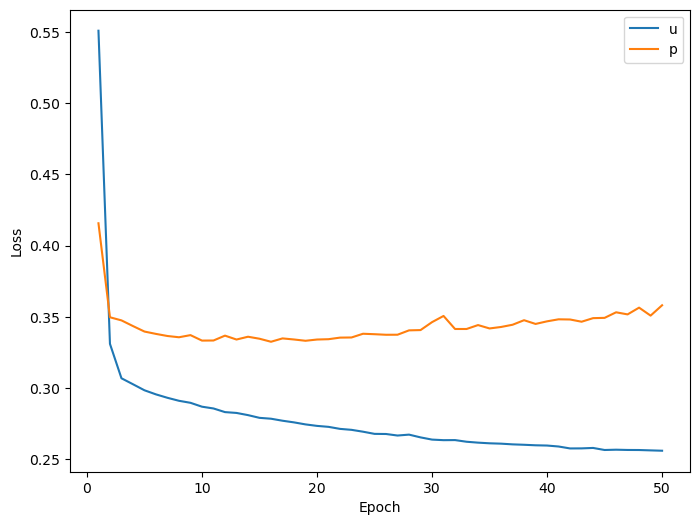

In [78]:
plt.figure(figsize=(8, 6))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend("upper right")

plt.show()

In [79]:
np.argmin(val_loss)

np.int64(15)

In [80]:
model.evaluate(X_test, y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc_2: 0.7242 - loss: 0.3375


[0.3374805748462677, 0.7241703867912292]